<a href="https://colab.research.google.com/github/luizfilipisousamoura/QuantumComputing/blob/main/QuantumComputingWithQiskit/14_rxGateOnState1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 5.1 MB/s 
     |████████████████████████████████| 19.2 MB 8.7 MB/s 
     |████████████████████████████████| 240 kB 46.5 MB/s 
     |████████████████████████████████| 55 kB 1.1 MB/s 
     |████████████████████████████████| 112 kB 68.7 MB/s 
     |████████████████████████████████| 943 kB 55.4 MB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
     |████████████████████████████████| 37.5 MB 45 kB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 
     |████████████████████████████████| 4.0 MB 39.2 MB/s 
     |████████████████████████████████| 1.9 MB 53.2 MB/s 
     |████████████████████████████████| 112 kB 70.3 MB/s 
  Created wheel for qiskit: filename=qiskit-0.38.0-py3-none-any.whl size=12147 sha256=2e6f47c556a68a9b6df20e59f9bb6d78ca5797c171f76d27354b87e0f208854b
  Stored in directory: /root/.cache/pip/wheels/0b/30/78/04c91b

In [ ]:
!pip3 install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 5.2 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=7f6a8eb920cfce0d5ddc811b79fe957d94622714e0f9a91bc89cfd8cf6f110ae
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, quantum_info, visualization
from qiskit.quantum_info import Statevector, DensityMatrix, state_fidelity
from qiskit.visualization import plot_state_qsphere, plot_state_city, plot_state_hinton, plot_state_paulivec, plot_bloch_multivector

In [ ]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

In [ ]:
qc.x(q[0]) #Apply X gate in order to get ket(1) state, since the registers start in ket(0)

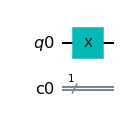

In [ ]:
qc.draw('mpl')

In [ ]:
psi1 = Statevector(qc)
psi1.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
rho1 = DensityMatrix(qc)
rho1.draw('latex', prefix='\\rho_1 = ')

<IPython.core.display.Latex object>

In [ ]:
from math import pi

In [ ]:
qc.rx(pi/2, q[0])

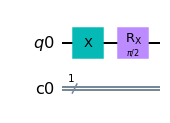

In [ ]:
qc.draw('mpl')

In [ ]:
psi2 = Statevector(qc)
psi2.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
rho2 = DensityMatrix(qc)
rho2.draw('latex', prefix='\\rho_2 = ')

<IPython.core.display.Latex object>

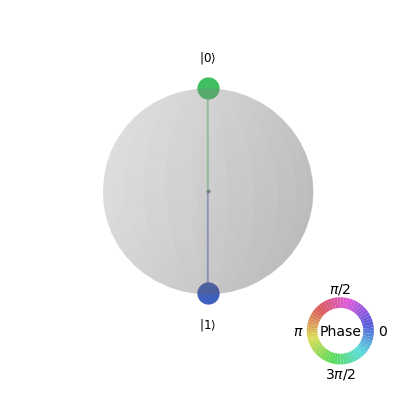

In [ ]:
plot_state_qsphere(qc)

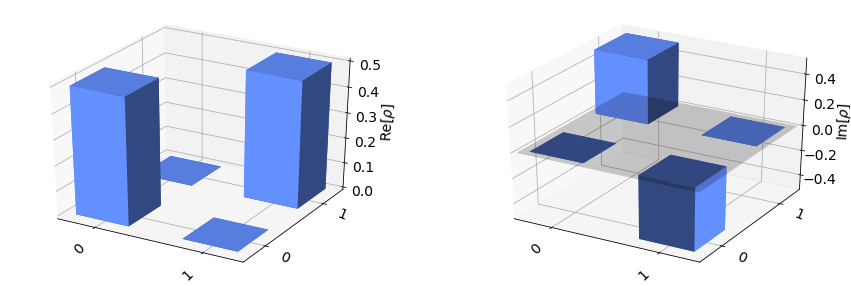

In [ ]:
plot_state_city(qc)

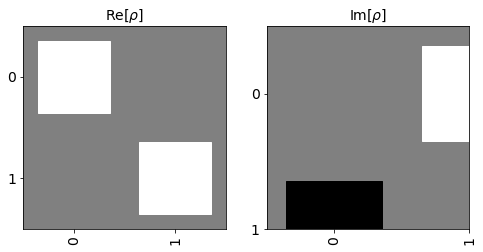

In [ ]:
plot_state_hinton(qc)

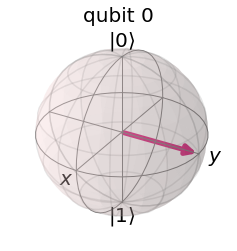

In [ ]:
plot_bloch_multivector(qc)

In [ ]:
purity = rho2.purity()
print(purity)

(1+0j)


In [ ]:
fidelity = state_fidelity(psi1, psi2)
print('Fidelity = ', fidelity)

Fidelity =  0.5000000000000001


In [ ]:
fidelity = state_fidelity(rho1, rho2)
print('Fidelity = ', fidelity)

Fidelity =  0.5000000000000003


In [ ]:
qc.measure(q[0], c[0])

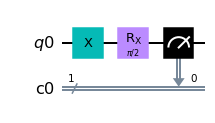

In [ ]:
qc.draw('mpl')

In [ ]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'1': 526, '0': 498}


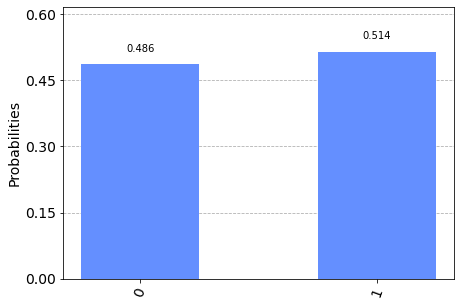

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)